In [92]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import the 'calendar' and 'datetime' module
import calendar
import datetime as dt


In [54]:
#Loading the dataset to pandas dataframe
data = pd.read_csv('/content/Unemployment in India.csv')

In [55]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [56]:
#Number of rows and columns
data.shape

(754, 7)

In [57]:
#Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [58]:
#Dataset Duplicate Value Count
dup = data.duplicated().sum()
print('Number of duplicate values:', dup)

Number of duplicate values: 13


In [59]:
#Missing Values
data.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

<Axes: >

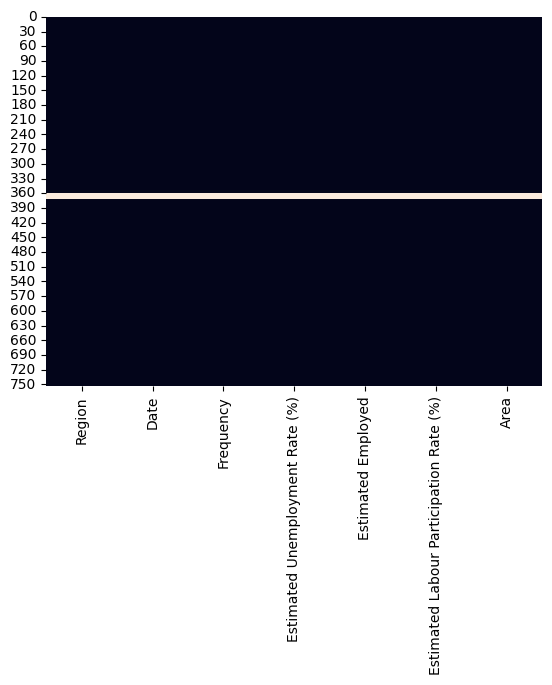

In [62]:
# Visualizing the missing values
# Checking Null Value by Plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

**What did i know about the dataset?**

1.  The Unemployment dataset consists of Region, Date, Unemployment Rate etc. for Indian states.
2.  There are 754 rows and 7 columns provided in the data.
3.  13 duplicate rows present in the dataset.
4.  14 Null values present in each of the columns available in dataset.




In [63]:
#Dataset Variables
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [65]:
#Describe --> statistical measures of the data
data.describe(include='all')

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.000000,7.400000e+02,740.000000,740
unique,28,14,1,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,740,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.787946,7.204460e+06,42.630122,NaN
std,NaN,NaN,NaN,10.721298,8.087988e+06,8.111094,NaN
min,NaN,NaN,NaN,0.000000,4.942000e+04,13.330000,NaN
25%,NaN,NaN,NaN,4.657500,1.190404e+06,38.062500,NaN
50%,NaN,NaN,NaN,8.350000,4.744178e+06,41.160000,NaN
75%,NaN,NaN,NaN,15.887500,1.127549e+07,45.505000,NaN


In [66]:
#Check Unique Values for each variable
data.nunique()

Region                                      28
Date                                        14
Frequency                                    1
Estimated Unemployment Rate (%)            624
Estimated Employed                         740
Estimated Labour Participation Rate (%)    626
Area                                         2
dtype: int64

In [13]:
# We don't need the 1st column so let's drop that
new_data=iris_data.iloc[:,1:]

In [67]:
# Rename the columns of the DataFrame
data.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']

In [69]:
# Convert the 'Frequency' column to a categorical data type
data['Frequency'] = data['Frequency'].astype('category')

# Convert the 'Region' column to a categorical data type
data['Region'] = data['Region'].astype('category')

In [72]:
# Convert the 'Date' column to datetime format, specifying 'dayfirst' to handle date formats with day first
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Extract the month from the 'Date' column and create a new 'Month' column
data['Month'] = data['Date'].dt.month

# Create a new 'Month_int' column by converting the 'Month' column to integers, handling missing values
data['Month_int'] = data['Month'].apply(lambda x: int(x) if pd.notna(x) else x)

In [73]:
# Drop the 'Month' column from the DataFrame
data.drop(columns='Month', inplace=True)

In [74]:
# Lets create a copy of the dataset for the data of during lockdown period
data_ld = data.copy()

In [75]:
# Drop all the missing values from 'df' dataset
data=data.dropna()

In [76]:
# Define a date range mask to filter rows where 'Date' falls within the range of before lockdown period
mask = (data['Date'] >= '2019-05-31') & (data['Date'] <= '2020-03-31')

# Use the mask to select and keep only the rows that meet the date range criteria
data = data.loc[mask]

In [77]:
# Define a date range mask to filter rows where 'Date' falls within the range of during lockdown period
mask = (data_ld['Date'] >= '2020-04-30')

# Use the mask to select and keep only the rows that meet the date range criteria
data_ld = data_ld.loc[mask]

**Data Visualization**

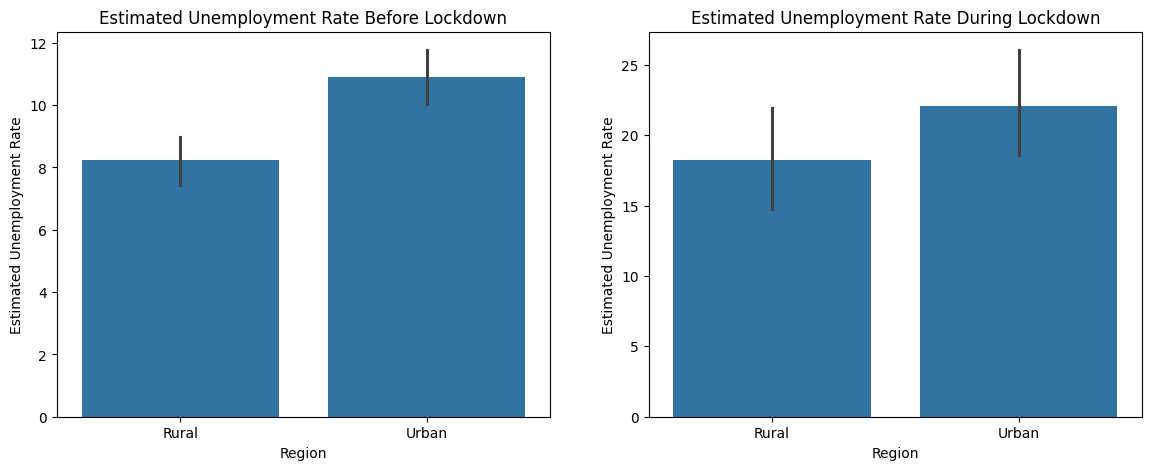

In [79]:
# Chart - 1 Bar plot visualization code for Region wise Estimated Unemployment Rate before and during lockdown

# Create a figure with two subplots side by side.
plt.figure(figsize=(14, 5))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Create a bar plot using Seaborn to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=data)

# Set labels and title for the first subplot.
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate Before Lockdown', fontsize=12)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Create a bar plot for the Estimated Unemployment Rate during lockdown.
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=data_ld)

# Set labels and title for the second subplot.
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate During Lockdown', fontsize=12)

# Display the subplots side by side.
plt.show()

**What are the insights found from the chart?**

From the above charts we got to know that the Estimated Unemployment Rate are much higher during the lockdown time compare to the before lockdown.

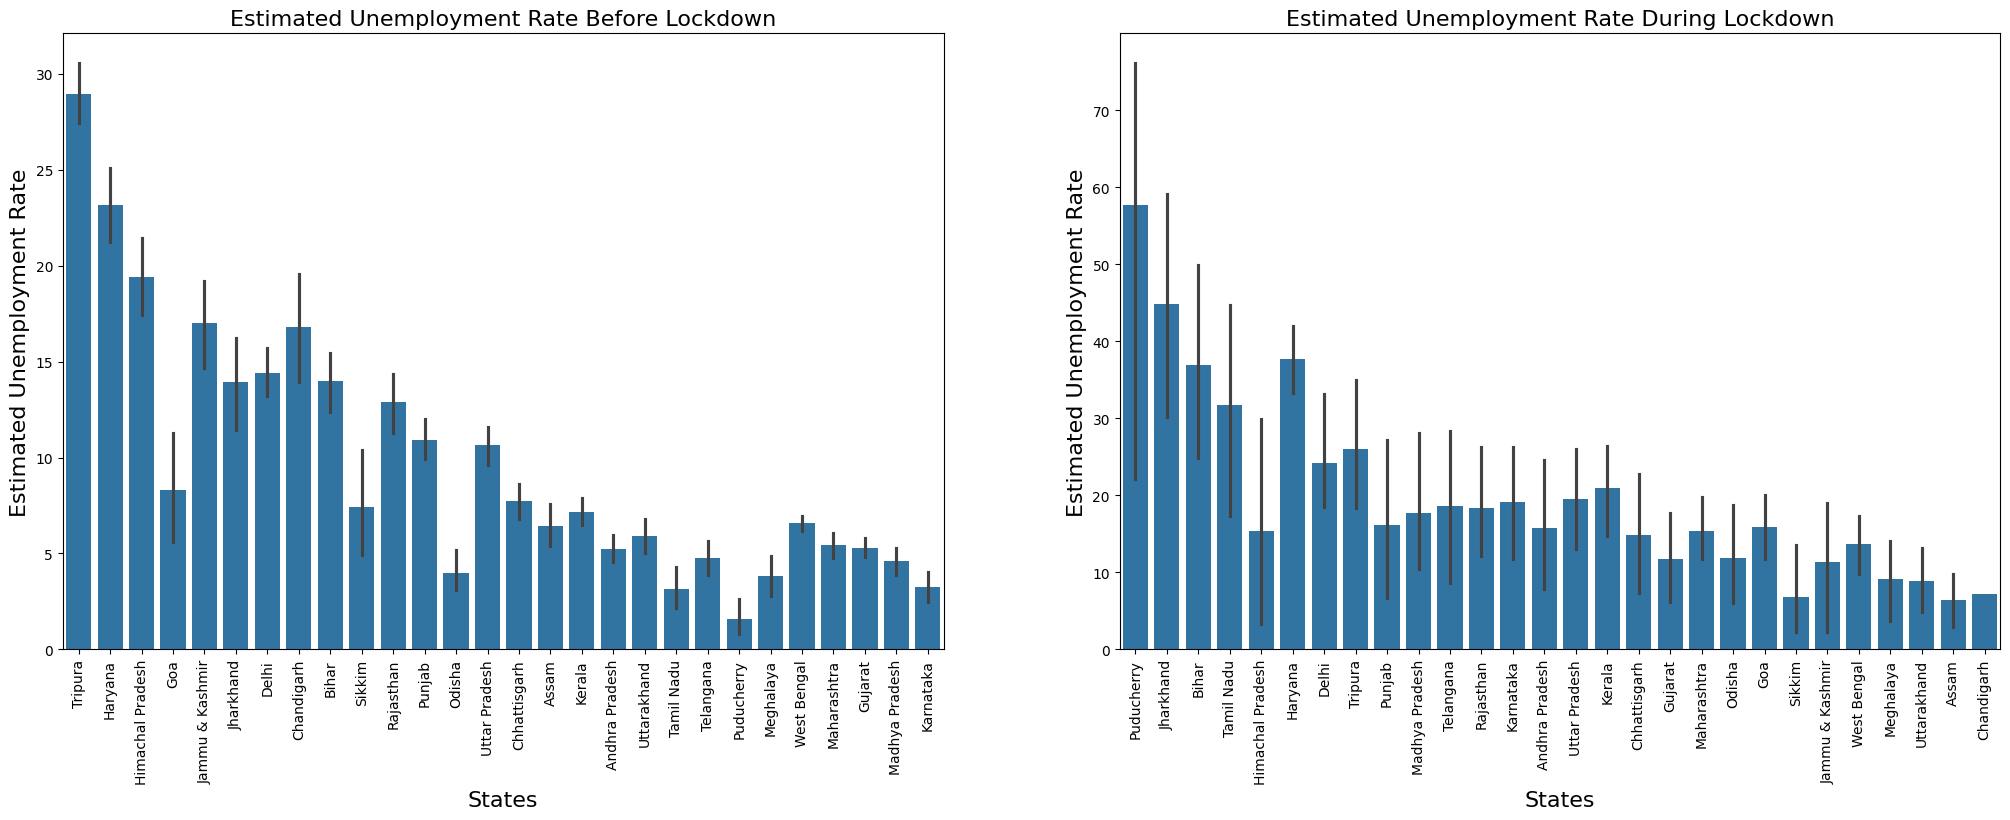

In [85]:
# Chart - 2 Bar for visualization code for State wise Estimated Unemployment Rate before and during lockdown time.

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(data=data.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate during lockdown.
sns.barplot(data=data_ld.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Display the subplots side by side.
plt.show()

**What are the insights found from the chart?**

From the above charts we got to know that, states like: Tripura, Haryana and Himachal Pradesh are in top on before lockdown time for Estimated Unemployment Rate. But, Puducherry, Jharkhand and Bihar comes in top during the lockdown time for Estimated Unemployment Rate.

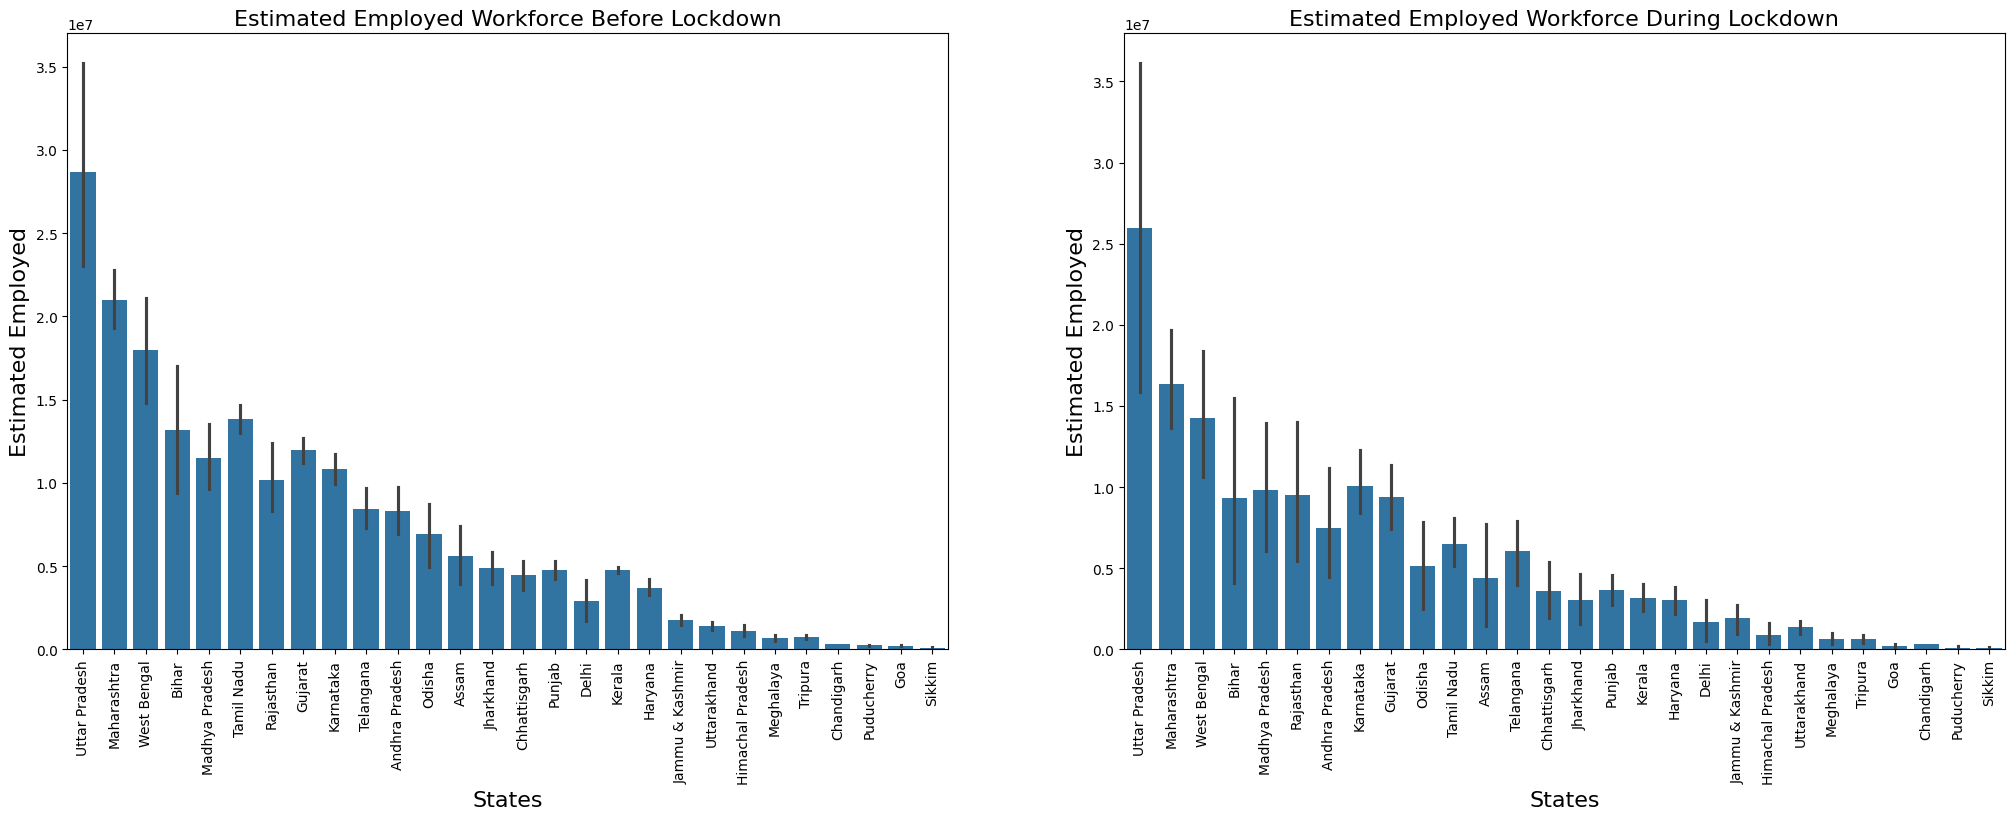

In [87]:
# Chart - 3 Bar plot visualization code for state wise Estimated Employed Workforce

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Employed Workforce Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Employed Workforce Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Employed Workforce before lockdown.
sns.barplot(data=data.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the first subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

# Subplot 2: Estimated Employed Workforce During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Employed Workforce During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Employed Workforce during lockdown.
sns.barplot(data=data_ld.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the second subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

# Display the subplots side by side.
plt.show()

**What are the insights found from the chart?**

From the above charts we got to know that, states like: Uttar Pradesh, Maharashtra and West Bengal are in top on before lockdown time for Estimated Employed Workforce. Again, Uttar Pradesh, Maharashtra and West Bengal are in top also during the lockdown time for Estimated Employed Workforce.

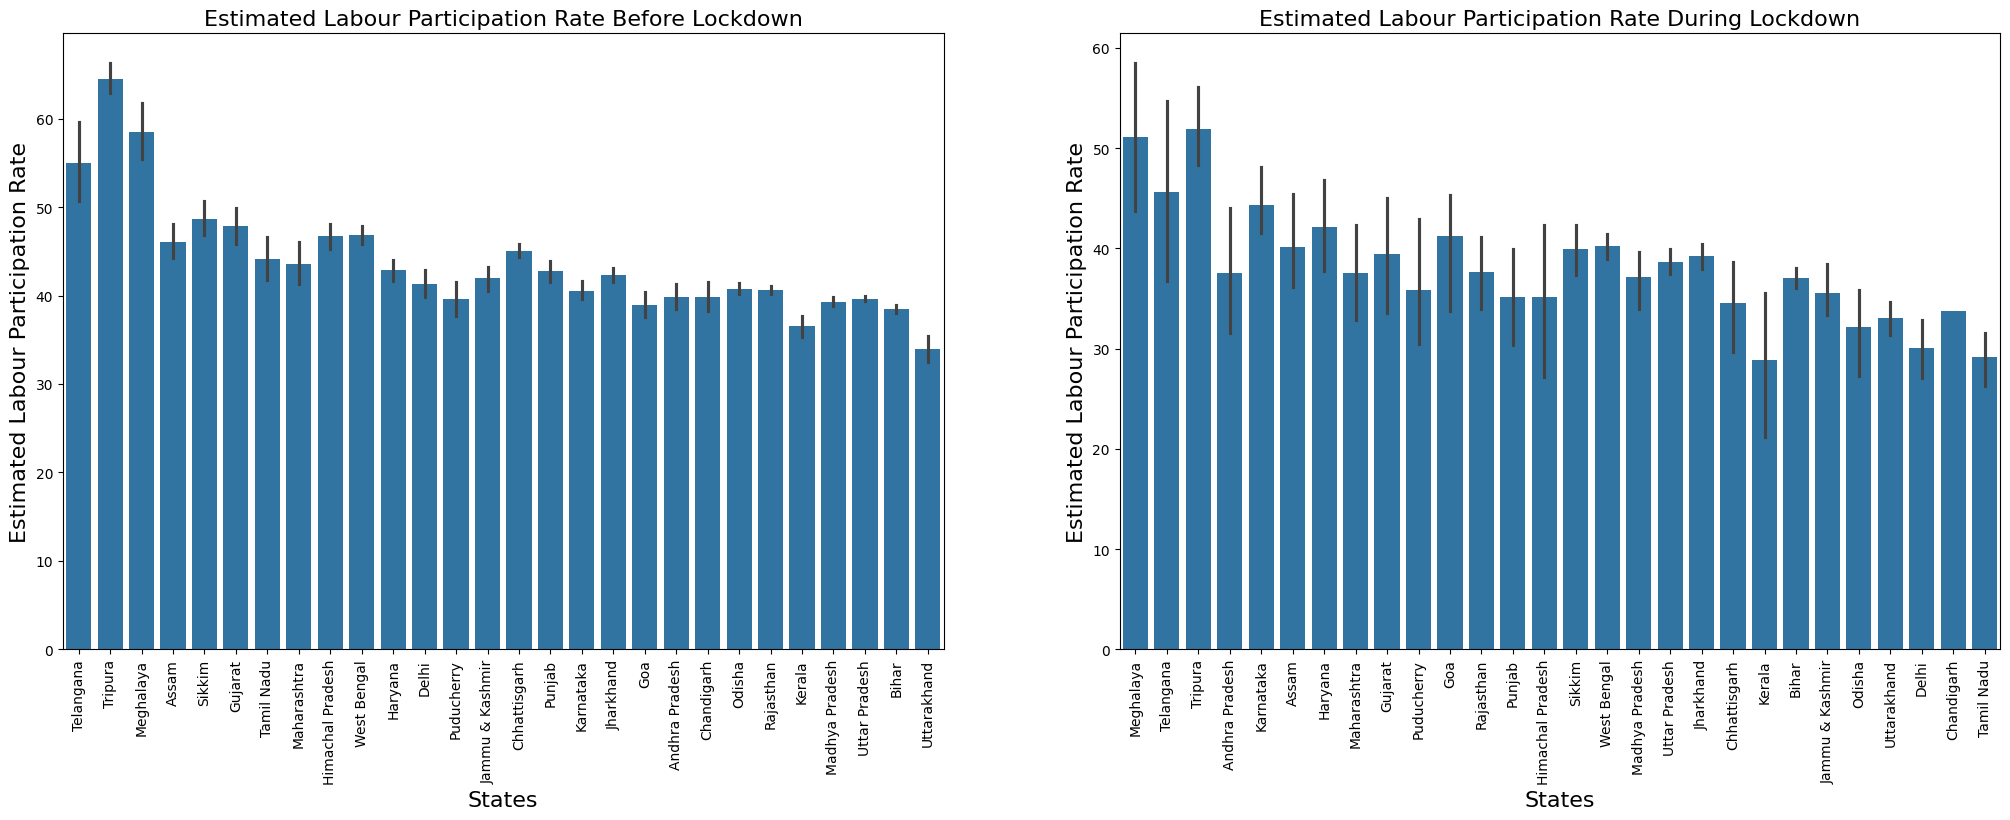

In [88]:
# Chart - 4 Bar plot visualization code for state wise Estimated Labour Participation Rate

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Labour Participation Rate Before Lockdown.
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Labour Participation Rate Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Labour Participation Rate before lockdown.
sns.barplot(data=data.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", y="Estimated Labour Participation Rate")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the first subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

# Subplot 2: Estimated Labour Participation Rate During Lockdown.
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Labour Participation Rate During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Labour Participation Rate during lockdown.
sns.barplot(data=data_ld.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", y="Estimated Labour Participation Rate")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the second subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

# Display the subplots side by side.
plt.show()

**What are the insights found from the chart?**

From the above charts we got to know that, states like: Telangana, Tripura, Meghalaya and Assam are in top for Estimated Labour Participation Rate, on before lockdown time. And Meghalaya, Telangana, Tripura and Andhra Pradesh are in top, during the lockdown time for Estimated Labour Participation Rate.

In [89]:
# Create new DataFrames
data1_stats = data[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]
data2_stats = data_ld[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]

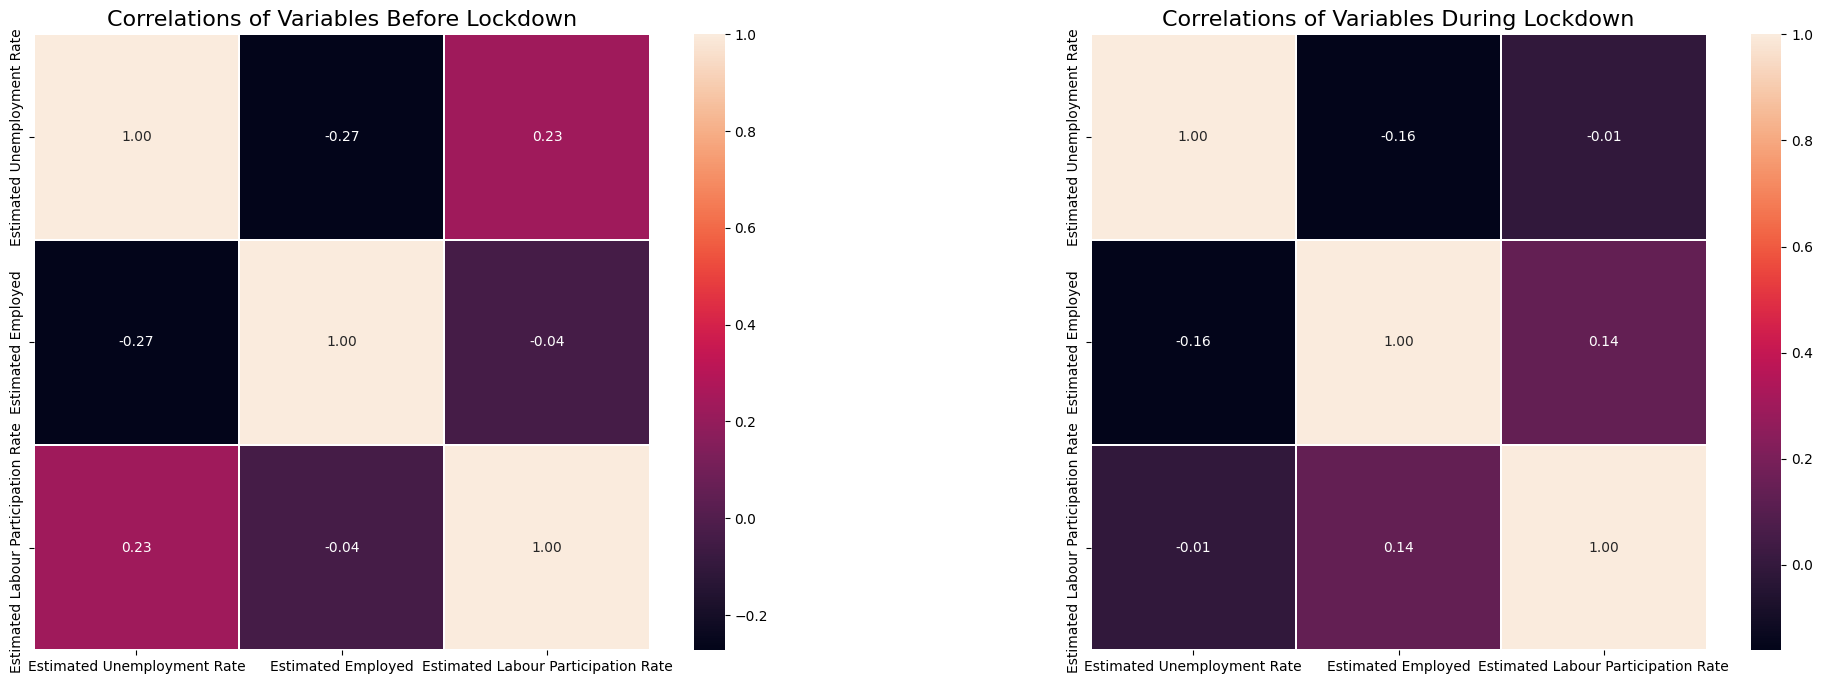

In [91]:
# Chart - 5 Correlation heatmap visualization code

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Correlations of Variables Before Lockdown.
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Correlations of Variables Before Lockdown", fontsize=16)

# Create a heatmap to visualize the correlations between variables in df1_stats.
sns.heatmap(data1_stats.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)

# Subplot 2: Correlations of Variables During Lockdown.
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Correlations of Variables During Lockdown", fontsize=16)

# Create a heatmap to visualize the correlations between variables in df2_stats.
sns.heatmap(data2_stats.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)

# Display the subplots side by side.
plt.show()

**What are the insights found from the chart?**

From the above heatmaps we got to know that, Estimated Unemployment Rate and Estimated Employed are negatively highly correlated for both, before and during lockdown time.

**CONCLUSION:**

In this data science project, we embarked on a comprehensive analysis of the unemployment rate, a critical economic indicator, with a particular focus on the unprecedented challenges brought about by the Covid-19 pandemic. Our exploratory data analysis yielded valuable insights that shed light on the dynamics of unemployment in India.

1. We observed a significant surge in the Estimated Unemployment Rate during the Covid-19 lockdown, underscoring the profound impact of the pandemic on the labor market.

2. Our state-wise analysis highlighted the states that bore the brunt of this crisis. Puducherry and Jharkhand stood out with the highest Estimated Unemployment Rates during the lockdown, while Haryana and Tripura held the top positions before the pandemic.

3. The transition from pre-lockdown to lockdown was marked by shifts in the states with the highest Estimated Unemployment Rates. Tripura, Haryana, and Himachal Pradesh led the rankings before the lockdown, whereas Puducherry, Jharkhand, and Bihar claimed the top spots during the lockdown.

4. Notably, states like Uttar Pradesh, Maharashtra, and West Bengal exhibited consistent challenges in maintaining high levels of Estimated Employed Workforce both before and during the lockdown.

5. Our analysis of Estimated Labour Participation Rate identified states that showed resilience in labor force participation. Telangana, Tripura, Meghalaya, and Assam topped the list before the lockdown, while Meghalaya, Telangana, Tripura, and Andhra Pradesh excelled during the lockdown.

6. We uncovered a robust negative correlation between Estimated Unemployment Rate and Estimated Employed, highlighting the intricate relationship between these two crucial employment indicators, both before and during the lockdown.

This project not only provided valuable insights into the economic impact of the Covid-19 pandemic but also demonstrated the power of data science in understanding and addressing complex socio-economic challenges. The findings contribute to informed decision-making and policy formulation, and underscore the importance of data-driven approaches in mitigating the effects of future crises.